# Short-time FFT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib widget
#%matplotlib inline

In [14]:
# Parámetro STFT

L = 64
M = 128
N = L*M

# Señal Chirp
B = 50
fs = 1000

n = np.arange(N)
t = n / fs

phase = np.pi * B * t**2

x = np.cos(phase)
#x = (N-n)/N * np.cos(phase)

(0.0, 1023.0)

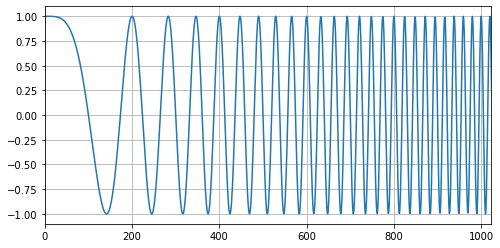

In [15]:
fig, ax = plt.subplots(figsize=[8,4])
ax.plot(n,x)
ax.grid('on')
ax.set_xlim([0,N/8-1])

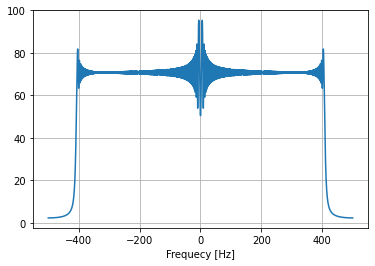

In [16]:
Xk = np.fft.fft(x)
Xk = np.fft.fftshift(Xk)
f = (np.arange(N)-N/2)*fs/N

fig = plt.figure()
plt.plot(f,np.abs(Xk))
plt.grid('on')
plt.xlabel('Frequecy [Hz]');

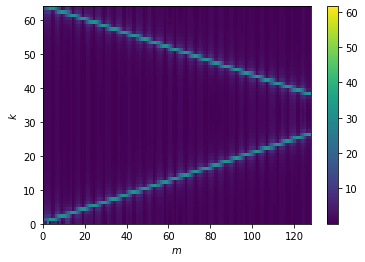

In [17]:
Xstft = np.zeros([M,L],np.cdouble)
for m in range(M):
    xm = x[m*L:(m+1)*L]
    Xstft[m,:] = np.fft.fft(xm)

fig = plt.figure()
c = plt.pcolor(np.abs(Xstft.T))
plt.xlabel('$m$')
plt.ylabel('$k$')
plt.colorbar(c)

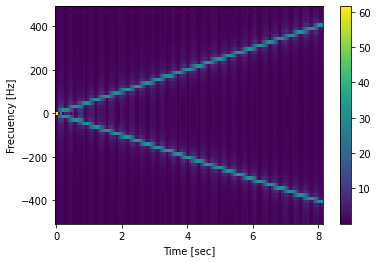

In [18]:
Xstft = np.fft.fftshift(Xstft,axes=1)
fk = (np.arange(L) - L/2) * fs / L
tm = np.arange(M) * L / fs
fig = plt.figure()
c = plt.pcolormesh(tm,fk,np.abs(Xstft.T),shading='auto')
plt.xlabel('Time [sec]')
plt.ylabel('Frecuency [Hz]')
plt.colorbar(c)

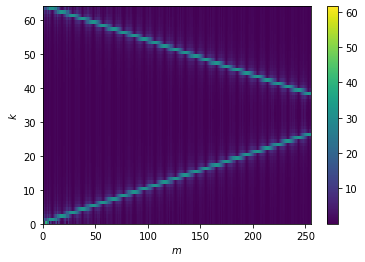

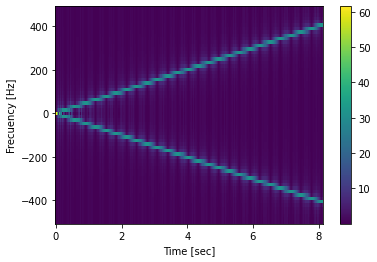

In [19]:
# Overlapping

Lo = 32
Mo = np.int64((N-Lo)/(L-Lo))

Xstft_ov = np.zeros([Mo,L],np.cdouble)
for m in range(Mo):
    xm = x[m*(L-Lo):((m+1)*L-m*Lo)]
    Xstft_ov[m,:] = np.fft.fft(xm)

fig = plt.figure()
c = plt.pcolor(np.abs(Xstft_ov.T))
plt.xlabel('$m$')
plt.ylabel('$k$')
plt.colorbar(c)
    
Xstft_ov = np.fft.fftshift(Xstft_ov,axes=1)
tov = np.arange(Mo) * (L-Lo) / fs
fig = plt.figure()
c = plt.pcolormesh(tov,fk,np.abs(Xstft_ov.T),shading='auto')

plt.xlabel('Time [sec]')
plt.ylabel('Frecuency [Hz]')
plt.colorbar(c)